In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
#importing and fixing os due to error on MKL dataleak.  Currently just annoying but this fixes it.  
import os
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
pres_gdp = pd.read_csv("presidentfinal_df.csv")
pres_bday = pd.read_csv("birthdates-of-us-presidents.csv")
pres_bday=pres_bday.drop("csvbase_row_id",axis=1)
pres_bday = pres_bday.rename(columns={"Date of birth":"birthday","Name":"name"})
pres_gdp=pres_gdp.rename(columns={  'Year':'year',
                                    'President':'president',
                                    'Party':'party',
                                    'Nominal GDP (million of Dollars)':"nominal_gdp(million_of_dollars)",
                                    'Real GDP (millions of 2017 dollars)':'real_gdp(millions_of_2017_dollars)',
                                    'GDP Deflator (index 2017=100)':'gdp_deflator_(index_2017=100)',
                                    'Population':'population',
                                    'Nominal GDP per capita (current dollars)':'nominal_gdp_per_capita_(current_dollars)',
                                    'Real GDP per capita (year 2017 dollars)':'real_gdp_per_capita_(year_2017_dollars)'
})


KeyError: "['csvbase_row_id'] not found in axis"

In [ ]:
pres_gdp.head(10)

,year,president,party,nominal_gdp(million_of_dollars),real_gdp(millions_of_2017_dollars),gdp_deflator_(index_2017=100),population,nominal_gdp_per_capita_(current_dollars),real_gdp_per_capita_(year_2017_dollars)
0,1789,George Washington,NaN,138.66,6894.01,2.01,6698461.39,20.7,1029.19
1,1790,George Washington,NaN,193,"4,975",3.88,"3,929,000",49.1,"1,266.23"
2,1791,George Washington,NaN,210,"5,274",3.98,"4,048,000",51.89,"1,302.85"
3,1792,George Washington,NaN,230,"5,663",4.05,"4,171,000",55.03,"1,357.63"
4,1793,George Washington,NaN,256,"6,113",4.19,"4,297,000",59.67,"1,422.52"
5,1794,George Washington,NaN,321,"6,905",4.65,"4,428,000",72.56,"1,559.46"
6,1795,George Washington,NaN,390,"7,331",5.32,"4,562,000",85.53,"1,607.03"
7,1796,George Washington,NaN,423,"7,553",5.60,"4,700,000",90.06,"1,606.92"
8,1797,John Adams,Federalist,415,"7,692",5.39,"4,843,000",85.65,"1,588.26"
9,1798,John Adams,Federalist,418,"8,009",5.22,"4,990,000",83.73,"1,605.09"


45

In [ ]:
pres_bday = pres_bday.rename(columns={"name" : "president"})
pres_bday.head()

,president,birthday
0,George Washington,1732-02-22
1,John Adams,1735-10-30
2,Thomas Jefferson,1743-04-13
3,James Madison,1751-03-16
4,James Monroe,1758-04-28


In [ ]:
joined_df = pres_bday.merge(pres_gdp, on="president", how="left")

joined_df['party'].fillna("none", inplace=True)

joined_df.fillna(0, inplace=True)

joined_df.head()

joined_df['party'].nunique()

7

In [ ]:
base_df = joined_df.copy()

base_df= base_df[['president', 'birthday','year','party','nominal_gdp(million_of_dollars)','nominal_gdp_per_capita_(current_dollars)']]

base_df['nominal_gdp(million_of_dollars)']= base_df['nominal_gdp(million_of_dollars)'].str.replace(',', '').astype(float)
base_df['nominal_gdp_per_capita_(current_dollars)']= base_df['nominal_gdp_per_capita_(current_dollars)'].str.replace(',', '').astype(float)
base_df.head(15)



,president,birthday,year,party,nominal_gdp(million_of_dollars),nominal_gdp_per_capita_(current_dollars)
0,George Washington,1732-02-22,1789.0,none,138.66,20.70
1,George Washington,1732-02-22,1790.0,none,193.00,49.10
2,George Washington,1732-02-22,1791.0,none,210.00,51.89
3,George Washington,1732-02-22,1792.0,none,230.00,55.03
4,George Washington,1732-02-22,1793.0,none,256.00,59.67
5,George Washington,1732-02-22,1794.0,none,321.00,72.56
6,George Washington,1732-02-22,1795.0,none,390.00,85.53
7,George Washington,1732-02-22,1796.0,none,423.00,90.06
8,John Adams,1735-10-30,1797.0,Federalist,415.00,85.65
9,John Adams,1735-10-30,1798.0,Federalist,418.00,83.73


In [ ]:
drop_df = base_df.drop(columns=["president",'party'])
drop_df.head()

,birthday,year,nominal_gdp(million_of_dollars),nominal_gdp_per_capita_(current_dollars)
0,1732-02-22,1789.0,138.66,20.70
1,1732-02-22,1790.0,193.00,49.10
2,1732-02-22,1791.0,210.00,51.89
3,1732-02-22,1792.0,230.00,55.03
4,1732-02-22,1793.0,256.00,59.67


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies` --- creates booleans of the categories
dummy_df1 = base_df[['president','party']]

dummy_df1.index=base_df['year']

dummy_df2 = pd.get_dummies(dummy_df1)

dummy_df2.head()

,president_Abraham Lincoln,president_Andrew Jackson,president_Andrew Johnson,president_Barack Obama,president_Benjamin Harrison,president_Bill Clinton,president_Calvin Coolidge,president_Chester A. Arthur,president_Donald Trump,president_Dwight D. Eisenhower,...,president_William McKinley,president_Woodrow Wilson,president_Zachary Taylor,party_Democrat,party_Democratic-Republican,party_Federalist,party_National Union,party_Republican,party_Whig,party_none
year,,,,,,,,,,,,,,,,,,,,,
1789.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1790.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1791.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1792.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1793.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dummy_df3 = pd.merge(drop_df, dummy_df2, on="year")

dummy_df3['birthday'] = pd.to_datetime(dummy_df3['birthday'])
# dummy_df3['birthday'] = dummy_df3['birthday'].astype(str)
# dummy_df3['birthday']= dummy_df3['birthday'].apply(lambda x: x.encode('utf-8'))
# dummy_df3['birthday']= dummy_df3['birthday'].apply(lambda x: x.decode('utf-8'))
dummy_df3['birthday'] = dummy_df3['birthday'].view('int64') // 10**9
# dummy_df3['birthday'] = dummy_df3['birthday'].astype(int)
dummy_df3.head()
dummy_df3.dtypes

birthday                                      int64
year                                        float64
nominal_gdp(million_of_dollars)             float64
nominal_gdp_per_capita_(current_dollars)    float64
president_Abraham Lincoln                      bool
president_Andrew Jackson                       bool
president_Andrew Johnson                       bool
president_Barack Obama                         bool
president_Benjamin Harrison                    bool
president_Bill Clinton                         bool
president_Calvin Coolidge                      bool
president_Chester A. Arthur                    bool
president_Donald Trump                         bool
president_Dwight D. Eisenhower                 bool
president_Franklin D. Roosevelt                bool
president_Franklin Pierce                      bool
president_George H. W. Bush                    bool
president_George W. Bush                       bool
president_George Washington                    bool
president_Ge

In [ ]:
dummy_df3.shape

(253, 56)

In [ ]:
##NN don't do well <10K datapoints, NN can't understand use ML algorithms -- target discrete values -- clustering or discrete value problem (elbow etc Kmeans, hier, and clustering)
## 1)based on inputs = 2) cluster 1 = 3) cluster 1 = this output
## birthday extract day of week = association
## non-shuffle label-encoding
## classification
## randomforest/ logistic (due to size)
## engineer new features - sklearn-- polynomial features column 1 and 2 and multiply etc-- interaction terms
## model selection tools 
## run column correlations against each other -- non linearity in dataset = tsne or dbscan
y=dummy_df3["birthday"]  #discrete value go with labelencoding -scikitlearn converts dates to 1-2-3-4-5 etc
# reverse label-encoding (inverse scaling example from class)
X=dummy_df3.loc[:, (dummy_df3.columns != "birthday") & (dummy_df3.columns != "year")]

X

,nominal_gdp(million_of_dollars),nominal_gdp_per_capita_(current_dollars),president_Abraham Lincoln,president_Andrew Jackson,president_Andrew Johnson,president_Barack Obama,president_Benjamin Harrison,president_Bill Clinton,president_Calvin Coolidge,president_Chester A. Arthur,...,president_William McKinley,president_Woodrow Wilson,president_Zachary Taylor,party_Democrat,party_Democratic-Republican,party_Federalist,party_National Union,party_Republican,party_Whig,party_none
0,138.66,20.70,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,193.00,49.10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,210.00,51.89,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,230.00,55.03,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,256.00,59.67,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,21521395.00,65115.12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
249,21322950.00,64266.79,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
250,23594031.00,70991.30,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
251,25744108.00,77171.74,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# just for now to train the thing
X = X.fillna(0)

X.to_csv("X.csv")

In [ ]:
print(X.shape)  # Should be (n_samples, n_features)
print(y.shape)  # Should be (n_samples,) or (n_samples, 1)

(253, 54)
(253,)


In [ ]:
# Split the preprocessed data into a training and testing dataset -- choose to stratify so that the classes are more balanced out bc it's a small dataset and imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=42)

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_logit = LogisticRegression(random_state=1)

# Fit the model using training data
model_logit.fit(X_train, y_train)

c:\Users\19727\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
# Make a prediction using the testing data
y_pred_logit = model_logit.predict(X_test)

pd.DataFrame({
    "actual": y_test,
    "predictions": y_pred_logit
}).head(7)


,actual,predictions
208,-1782000000,-275616000
6,-7506086400,-737510400
79,-5080924800,-275616000
204,-1935964800,-275616000
117,-4190486400,-275616000
184,-2695161600,-275616000
200,-1659744000,-275616000


In [ ]:
#accuracy score
accuracy_score(y_true= y_test, y_pred= y_pred_logit)

0.0

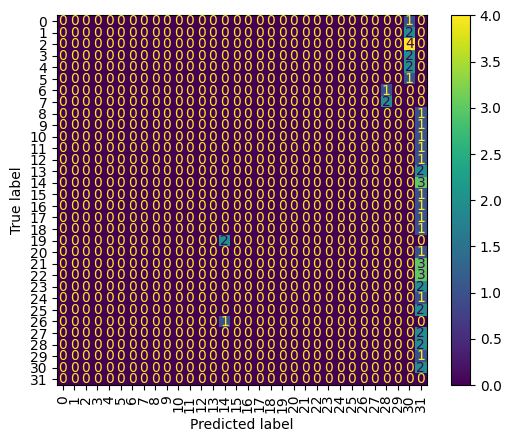

In [ ]:
#Generate a confusion matrix for the model
cm_df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_logit))

cm_df

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logit))
disp.plot(xticks_rotation=90)

#Remember -- risk 1 status is 
# [[TN,  FP],
# [ FN, TP]]

In [ ]:
# Print the classification report for the model
print(classification_report(y_true = y_test, y_pred = y_pred_logit))

              precision    recall  f1-score   support

 -7506086400       0.00      0.00      0.00       1.0
 -7389792000       0.00      0.00      0.00       2.0
 -7154611200       0.00      0.00      0.00       4.0
 -6904569600       0.00      0.00      0.00       2.0
 -6679929600       0.00      0.00      0.00       2.0
 -6399734400       0.00      0.00      0.00       1.0
 -5349024000       0.00      0.00      0.00       1.0
 -5210265600       0.00      0.00      0.00       2.0
 -5080924800       0.00      0.00      0.00       1.0
 -5051721600       0.00      0.00      0.00       1.0
 -4660416000       0.00      0.00      0.00       1.0
 -4438368000       0.00      0.00      0.00       1.0
 -4358620800       0.00      0.00      0.00       1.0
 -4303324800       0.00      0.00      0.00       2.0
 -4190486400       0.00      0.00      0.00       3.0
 -3543696000       0.00      0.00      0.00       1.0
 -3508531200       0.00      0.00      0.00       1.0
 -3309897600       0.00    

c:\Users\19727\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\19727\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\19727\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\19727\Anacon